In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [12]:
# Load datasets
campaigns = pd.read_csv('../data/dataset_fashion_store_campaigns.csv')
channels = pd.read_csv('../data/dataset_fashion_store_channels.csv')
customers = pd.read_csv('../data/dataset_fashion_store_customers.csv')
products = pd.read_csv('../data/dataset_fashion_store_products.csv')
sales = pd.read_csv('../data/dataset_fashion_store_sales.csv')
salesitems = pd.read_csv('../data/dataset_fashion_store_salesitems.csv')
stock = pd.read_csv('../data/dataset_fashion_store_stock.csv')

# Confirm successful loading by displaying the shape of each
print("Campaigns:", campaigns.shape)
print("Channels:", channels.shape)
print("Customers:", customers.shape)
print("Products:", products.shape)
print("Sales:", sales.shape)
print("Sales Items:", salesitems.shape)
print("Stock:", stock.shape)

Campaigns: (7, 7)
Channels: (2, 2)
Customers: (1000, 4)
Products: (500, 9)
Sales: (905, 7)
Sales Items: (2253, 13)
Stock: (1000, 3)


In [14]:
# View columns and first 5 rows for each dataset

print("CAMPAIGNS")
print(campaigns.columns)
print(campaigns.head(), "\n")

print("CHANNELS")
print(channels.columns)
print(channels.head(), "\n")

print("CUSTOMERS")
print(customers.columns)
print(customers.head(), "\n")

print("PRODUCTS")
print(products.columns)
print(products.head(), "\n")

print("SALES")
print(sales.columns)
print(sales.head(), "\n")

print("SALES ITEMS")
print(salesitems.columns)
print(salesitems.head(), "\n")

print("STOCK")
print(stock.columns)
print(stock.head(), "\n")


CAMPAIGNS
Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'discount_type', 'discount_value'],
      dtype='object')
   campaign_id          campaign_name  start_date    end_date       channel  \
0            1      Spring Flash Sale  2025-04-01  2025-04-07         Email   
1            2       Easter Promotion  2025-04-08  2025-04-15  Social Media   
2            3  Mother's Day Campaign  2025-05-01  2025-05-09         Email   
3            4   Mid-Season Clearance  2025-05-10  2025-05-19    App Mobile   
4            5              TIVA Week  2025-05-20  2025-05-31  Social Media   

  discount_type discount_value  
0    Percentage         10.00%  
1         Fixed             10  
2    Percentage         25.00%  
3    Percentage         30.00%  
4    Percentage         30.00%   

CHANNELS
Index(['channel', 'description'], dtype='object')
      channel            description
0  E-commerce  Official online store
1  App Mobile       Brand mobile app 

CU

In [16]:
# Convert date columns
sales['sale_date'] = pd.to_datetime(sales['sale_date'])
customers['signup_date'] = pd.to_datetime(customers['signup_date'])
campaigns['start_date'] = pd.to_datetime(campaigns['start_date'])
campaigns['end_date'] = pd.to_datetime(campaigns['end_date'])
salesitems['sale_date'] = pd.to_datetime(salesitems['sale_date'])

print("Date columns converted successfully.")


Date columns converted successfully.


In [18]:
# Check missing values in all datasets
print("Missing values in Campaigns:\n", campaigns.isnull().sum(), "\n")
print("Missing values in Channels:\n", channels.isnull().sum(), "\n")
print("Missing values in Customers:\n", customers.isnull().sum(), "\n")
print("Missing values in Products:\n", products.isnull().sum(), "\n")
print("Missing values in Sales:\n", sales.isnull().sum(), "\n")
print("Missing values in Sales Items:\n", salesitems.isnull().sum(), "\n")
print("Missing values in Stock:\n", stock.isnull().sum(), "\n")


Missing values in Campaigns:
 campaign_id       0
campaign_name     0
start_date        0
end_date          0
channel           0
discount_type     0
discount_value    0
dtype: int64 

Missing values in Channels:
 channel        0
description    0
dtype: int64 

Missing values in Customers:
 customer_id    0
country        0
age_range      0
signup_date    0
dtype: int64 

Missing values in Products:
 product_id       0
product_name     0
category         0
brand            0
color            0
size             0
catalog_price    0
cost_price       0
gender           0
dtype: int64 

Missing values in Sales:
 sale_id         0
channel         0
discounted      0
total_amount    0
sale_date       0
customer_id     0
country         0
dtype: int64 

Missing values in Sales Items:
 item_id              0
sale_id              0
product_id           0
quantity             0
original_price       0
unit_price           0
discount_applied     0
discount_percent     0
discounted           0
ite

In [20]:
print("Duplicates in Campaigns:", campaigns.duplicated().sum())
print("Duplicates in Channels:", channels.duplicated().sum())
print("Duplicates in Customers:", customers.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())
print("Duplicates in Sales:", sales.duplicated().sum())
print("Duplicates in Sales Items:", salesitems.duplicated().sum())
print("Duplicates in Stock:", stock.duplicated().sum())


Duplicates in Campaigns: 0
Duplicates in Channels: 0
Duplicates in Customers: 0
Duplicates in Products: 0
Duplicates in Sales: 0
Duplicates in Sales Items: 0
Duplicates in Stock: 0


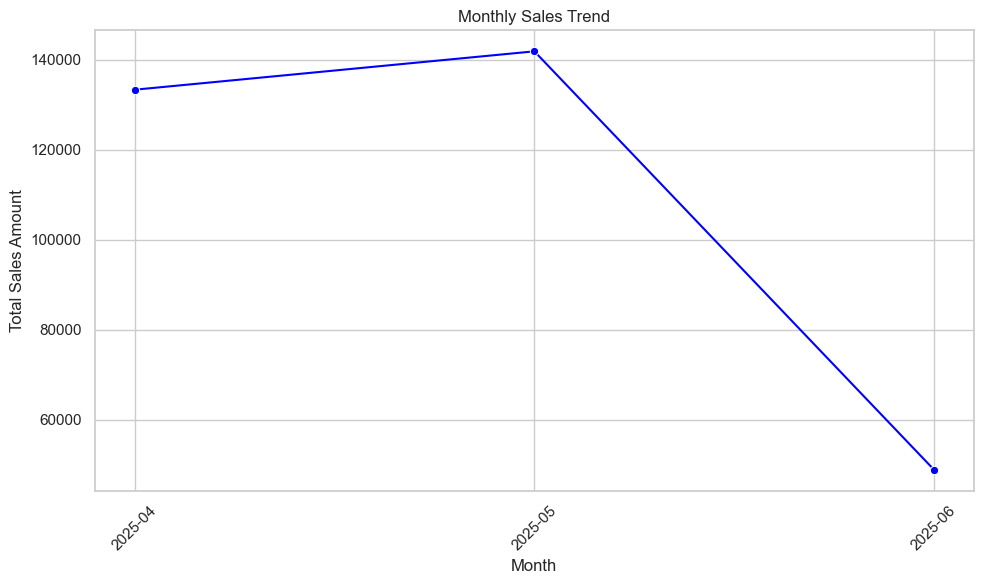

In [22]:
# 1️⃣ Create a 'month' column for grouping
sales['month'] = sales['sale_date'].dt.to_period('M')

# 2️⃣ Calculate total monthly sales
monthly_sales = sales.groupby('month')['total_amount'].sum().reset_index()

# 3️⃣ Convert 'month' to string for clean plotting
monthly_sales['month'] = monthly_sales['month'].astype(str)

# 4️⃣ Plotting the Monthly Sales Trend
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='month', y='total_amount', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# 5️⃣ Save the chart for your portfolio
plt.savefig('../outputs/charts/monthly_sales_trend.png')

plt.show()


In [28]:
# Merge salesitems with products to get product names
salesitems_products = pd.merge(
    salesitems,
    products[['product_id', 'product_name']],
    on='product_id',
    how='left'
)

In [30]:
# Group by product name to get total revenue
product_revenue = salesitems_products.groupby('product_name')['item_total'].sum().reset_index()

# Sort descending to get top 10
top10_products = product_revenue.sort_values(by='item_total', ascending=False).head(10)


C:\Users\user\AppData\Local\Temp\ipykernel_19828\724791196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_products, x='item_total', y='product_name', palette='viridis')


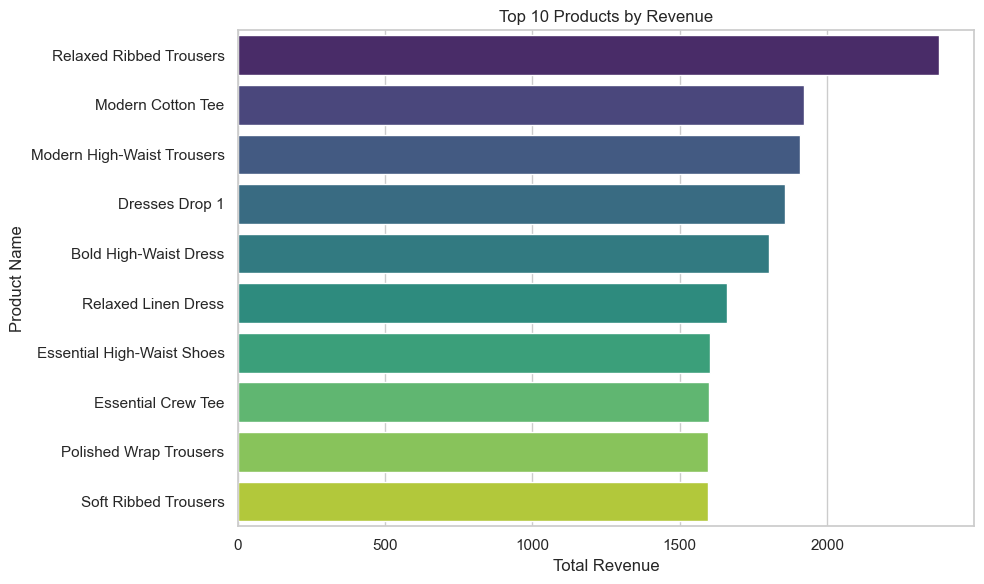

In [32]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top10_products, x='item_total', y='product_name', palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()

# Save the chart
plt.savefig('../outputs/charts/top10_products_revenue.png')

plt.show()


In [38]:
# Group sales data by channel to get total revenue
channel_sales = sales.groupby('channel')['total_amount'].sum().reset_index().sort_values(by='total_amount', ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_19828\1252136937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_sales, x='total_amount', y='channel', palette='magma')


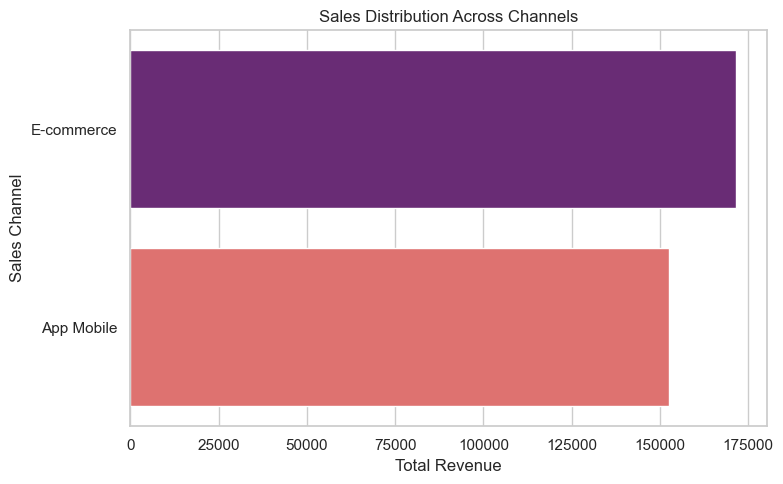

In [40]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=channel_sales, x='total_amount', y='channel', palette='magma')
plt.title('Sales Distribution Across Channels')
plt.xlabel('Total Revenue')
plt.ylabel('Sales Channel')
plt.tight_layout()

# Save the chart
plt.savefig('../outputs/charts/sales_distribution_channels.png')

plt.show()


In [56]:
print(customers.columns)

Index(['customer_id', 'country', 'age_range', 'signup_date'], dtype='object')


In [64]:
customer_sales = pd.merge(
    sales[['customer_id', 'total_amount']],
    customers[['customer_id', 'age_range']],
    on='customer_id',
    how='left'
)

In [66]:
# Group by age_range to get total sales
age_group_sales = customer_sales.groupby('age_range')['total_amount'].sum().reset_index().sort_values(by='total_amount', ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_19828\1439924569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_sales, x='total_amount', y='age_range', palette='coolwarm')


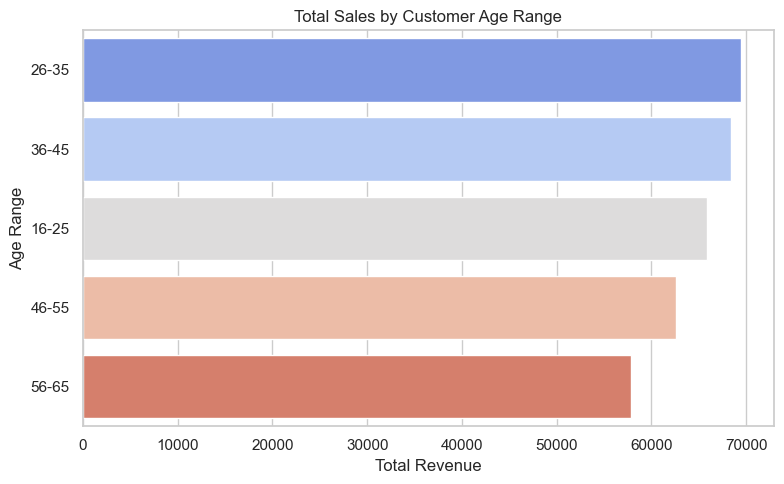

In [68]:
plt.figure(figsize=(8,5))
sns.barplot(data=age_group_sales, x='total_amount', y='age_range', palette='coolwarm')
plt.title('Total Sales by Customer Age Range')
plt.xlabel('Total Revenue')
plt.ylabel('Age Range')
plt.tight_layout()

# Save chart
plt.savefig('../outputs/charts/sales_by_age_range.png')

plt.show()

In [72]:
# Convert discount_percent to numeric if needed
salesitems['discount_percent'] = salesitems['discount_percent'].str.rstrip('%').astype(float)

# Create discount bins
bins = [-1, 0, 10, 20, 30, 100]
labels = ['0%', '1-10%', '11-20%', '21-30%', '31%+']
salesitems['discount_bin'] = pd.cut(salesitems['discount_percent'], bins=bins, labels=labels)

In [74]:
discount_sales = salesitems.groupby('discount_bin')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_19828\1907732605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_sales = salesitems.groupby('discount_bin')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)


C:\Users\user\AppData\Local\Temp\ipykernel_19828\4114109726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_sales, x='quantity', y='discount_bin', palette='plasma')


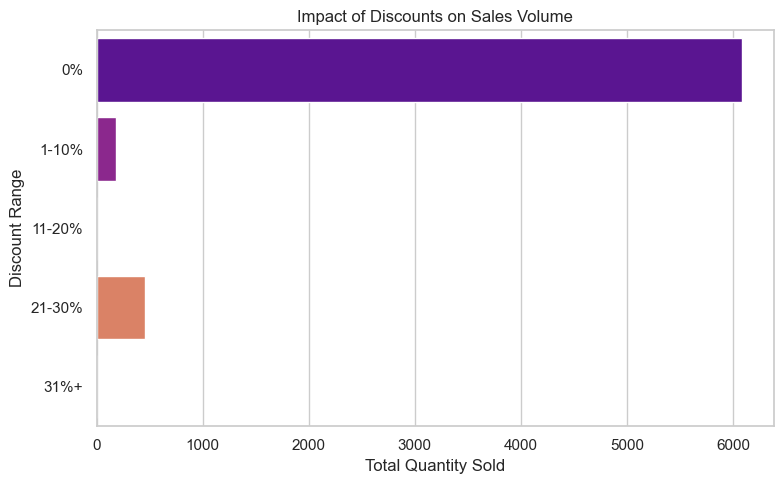

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(data=discount_sales, x='quantity', y='discount_bin', palette='plasma')
plt.title('Impact of Discounts on Sales Volume')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Discount Range')
plt.tight_layout()

# Save chart
plt.savefig('../outputs/charts/discount_impact_sales_volume.png')

plt.show()

In [78]:
# Convert sale_date to datetime
salesitems['sale_date'] = pd.to_datetime(salesitems['sale_date'])

In [80]:
# Extract Year-Month for grouping
salesitems['month'] = salesitems['sale_date'].dt.to_period('M')

In [82]:
monthly_sales = salesitems.groupby('month')['item_total'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

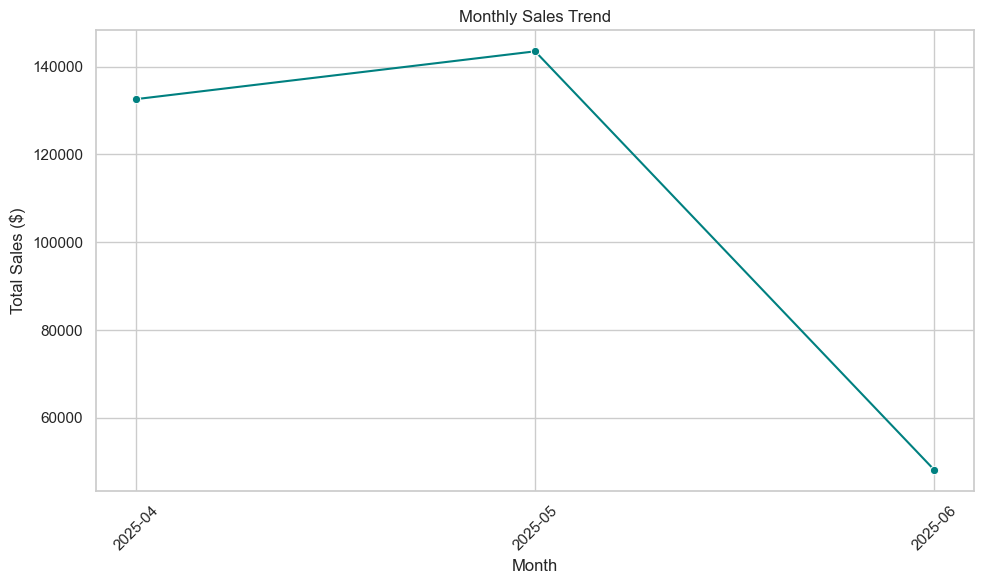

In [84]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='month', y='item_total', marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig('../outputs/charts/monthly_sales_trend.png')

plt.show()